# Module import

In [1]:
from ETGEMs_function import *

# Data initialization

In [2]:
import pandas as pd
import cobra
#Get Reaction G0 from local file
reaction_g0_file='./Basic Data/reaction_g0.txt'
#Get Metabolite concentration from local file
metabolites_lnC_file = './Basic Data/metabolites_lnC.txt'
#Get Model from local file
model_file='./Basic Data/iML1515.xml'
#Get reaction kcat data from ECMpy
reaction_kcat_MW_file='./Basic Data/ID_kcat_MW_file.csv'

Concretemodel_Need_Data=Get_Concretemodel_Need_Data(reaction_g0_file,metabolites_lnC_file,model_file,reaction_kcat_MW_file)

# Solving maximum growth by different models
This is batch computing for four different models (iML1515 model, EcoECM, EcoTCM and EcoETM).

In [3]:
import pandas as pd
import numpy as np
import datetime
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ as pyo
from concurrent.futures import ProcessPoolExecutor, as_completed
starttime = datetime.datetime.now()
Biomass_list=pd.DataFrame()
obj_name='BIOMASS_Ec_iML1515_core_75p37M'
obj_target='maximize'
E_total=0.114 #eaual to e_pool （0.228）* saturation（0.5）
substrate_name='EX_glc__D_e_reverse'
substrate_value_list=np.linspace(0.1,15.1,num=150,endpoint=False,retstep=True)[0][2:]
K_value=1249
B_value=0

with ProcessPoolExecutor() as executor:
    futures = {executor.submit(Max_OBJ_By_Four_Model,Concretemodel_Need_Data,obj_name,obj_target,substrate_name,substrate_value,\
                    K_value,B_value,E_total,'gurobi'): substrate_value for substrate_value in substrate_value_list}
    for future in as_completed(futures):
        tmp = future.result()
        for eachindex in tmp.index:
            #print(eachindex,tmp.loc[eachindex,'max_value'])
            Biomass_list.loc[eachindex,'iML1515']=tmp.loc[eachindex,'iML1515']
            Biomass_list.loc[eachindex,'EcoECM']=tmp.loc[eachindex,'EcoECM']
            Biomass_list.loc[eachindex,'EcoTCM(Dfi>=0)']=tmp.loc[eachindex,'EcoTCM(Dfi>=0)']
            Biomass_list.loc[eachindex,'EcoETM']=tmp.loc[eachindex,'EcoETM']

endtime = datetime.datetime.now()
print (endtime - starttime)
Biomass_list.to_csv('./Analysis Result/Biomass_list.csv', sep=',', header=True, index=True,mode='w')

0:09:09.070695


# Results output

In [4]:
import pandas as pd
Biomass_list=pd.read_csv('./Analysis Result/Biomass_list.csv',index_col=0)
Biomass_list=Biomass_list.sort_index(ascending=True) 
Biomass_list.head(10)

,iML1515,EcoECM,EcoTCM(Dfi>=0),EcoETM
0.3,0.000735,0.000735,0.000731,0.000730
0.4,0.009807,0.009807,0.009767,0.009759
0.5,0.018879,0.018879,0.018770,0.018746
0.6,0.027952,0.027952,0.027817,0.027755
0.7,0.037024,0.037024,0.036764,0.036764
0.8,0.046097,0.046097,0.045773,0.045773
0.9,0.055170,0.055170,0.054782,0.054782
1.0,0.064243,0.064243,0.063790,0.063790
1.1,0.073315,0.073315,0.072799,0.072799
1.2,0.082388,0.082388,0.081808,0.081808


# Draw the growth curve

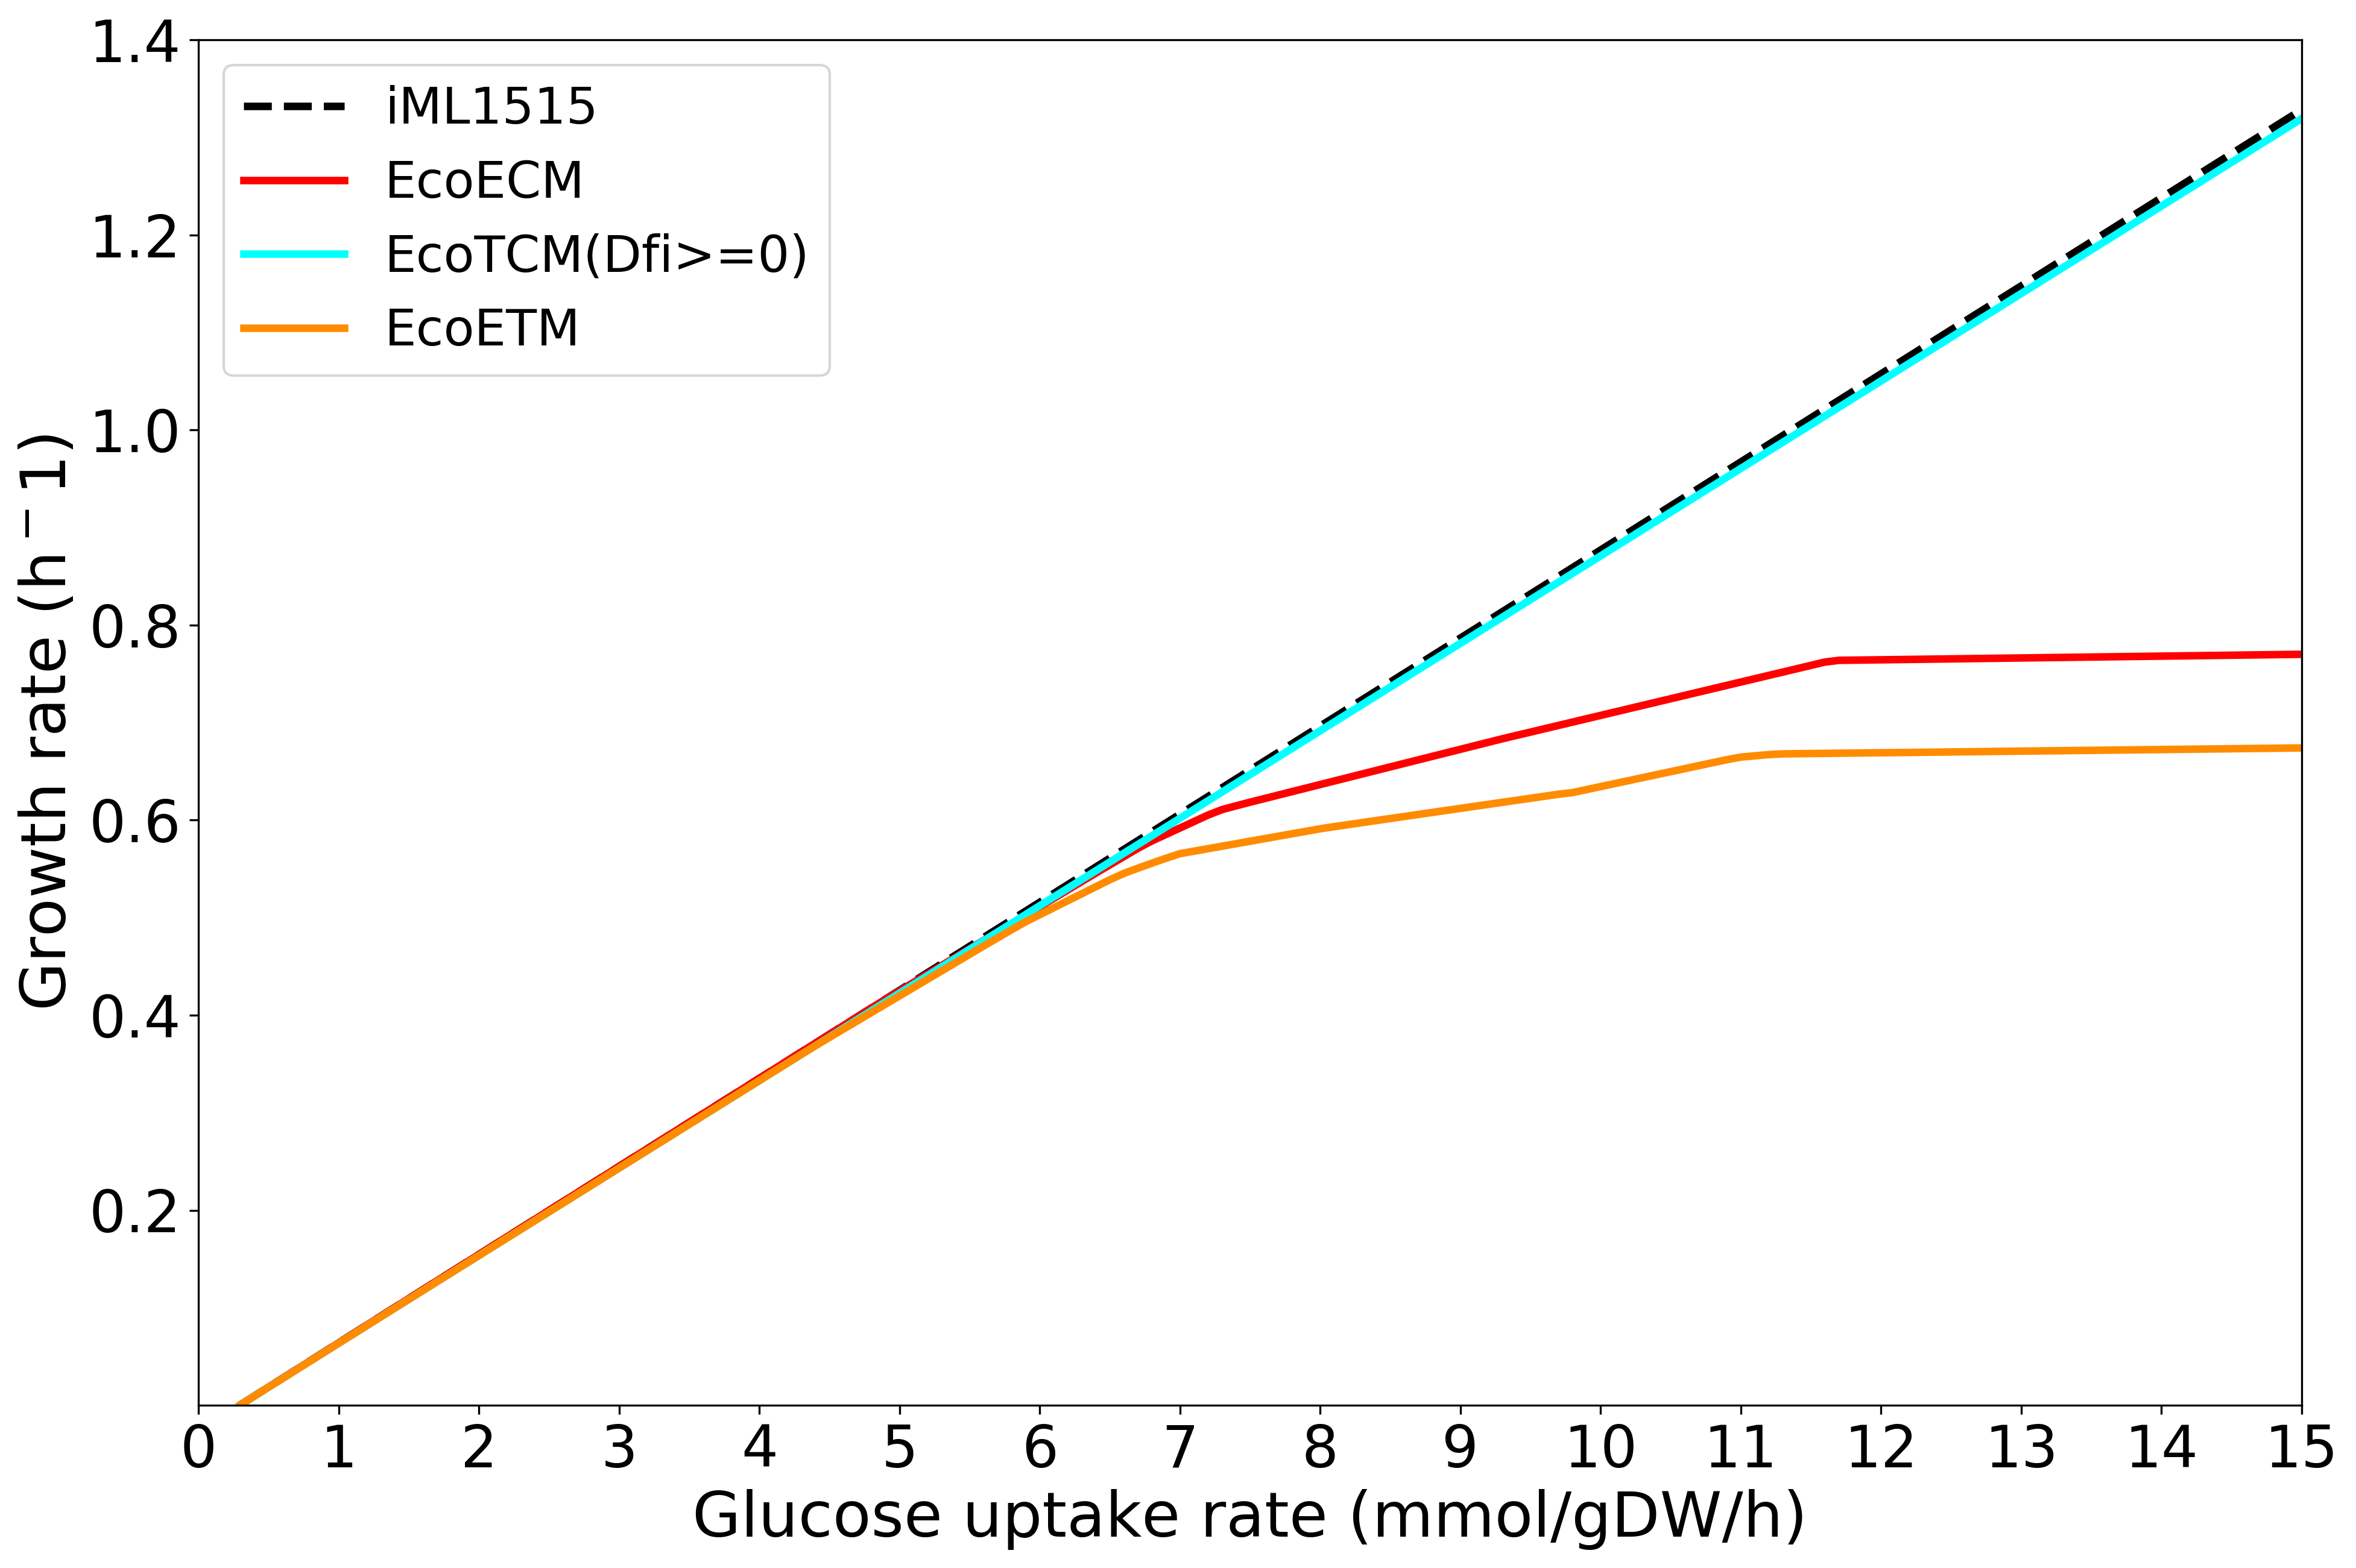

In [5]:
Draw_Biomass_By_Glucose_rate(Biomass_list)